In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sigproc_kit import *
import random

In [2]:
#%matplotlib notebook

def QFM(t,vp,**kwargs):
  delay = kwargs.get("delay",5e-9)
  vcc = kwargs.get("vcc",1)
  c = 10e-12
  i_disch = 1e-3
  dt = t[1]-t[0]
  uc = t * 0
  logic_out = t * 0
  uc[0] = vcc
  
  wait = 0
  triggered = 0

  discharge_state = 0
  wait_state      = 1
    
  state = discharge_state
    
  for i in range(0,len(t)-1):
    
    
    if (uc[i] > vp[i]) and (state == discharge_state): # not hit the threshold from above
      uc[i+1] = uc[i] - i_disch*dt/c
    else: # hit the threshold from above
      uc[i+1] = vcc
      logic_out[i+1] = 1
      if state == discharge_state:
        wait = delay
        state = wait_state
    
    if state == wait_state:
      wait = wait - dt
        
    if (wait <= 0):
      wait = 0
      state = discharge_state
    
    
  return (logic_out, uc)


In [3]:
t = np.linspace(0,1e-6,50000)
vp = t*0 +0.5


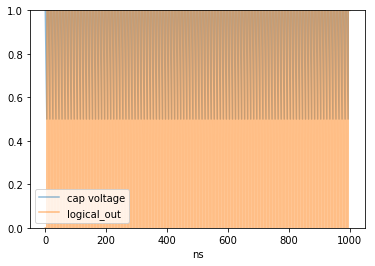

In [4]:
logic_out, uc = QFM(t,vp)

plt.plot(t*1e9,uc,alpha=0.5,label="cap voltage")
plt.plot(t*1e9,logic_out,alpha=0.5,label="logical_out")
plt.xlabel("ns")
plt.ylim(0,1)
plt.legend()
#plt.xlim(0,100)
plt.show()



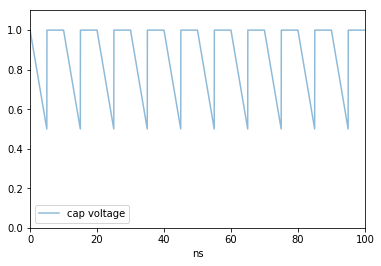

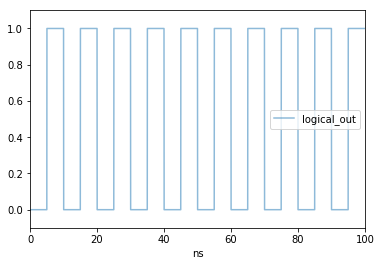

In [5]:
logic_out, uc = QFM(t,vp)

plt.plot(t*1e9,uc,alpha=0.5,label="cap voltage")
#plt.plot(t*1e9,logic_out,alpha=0.5,label="logical_out")
plt.xlabel("ns")
plt.ylim(0,1.1)
plt.legend()
plt.xlim(0,100)
plt.show()

#plt.plot(t*1e9,uc,alpha=0.5,label="cap voltage")
plt.plot(t*1e9,logic_out,alpha=0.5,label="logical_out")
plt.xlabel("ns")
plt.ylim(-0.1,1.1)
plt.legend()
plt.xlim(0,100)
plt.show()



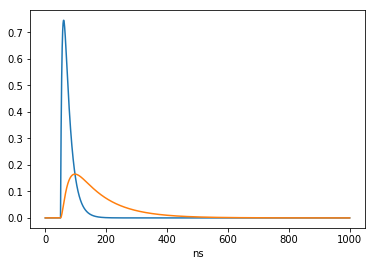

In [6]:
Q = 500e-12
tau1 = 6e-9
tau2 = 20e-9
modulation  = detector_signal_function(t, Q, tau1, tau2, 50e-9)

R=1e3
C=100e-12
mod_rc = RC_filter(t,modulation,R,C)

plt.plot(t*1e9,modulation)
plt.plot(t*1e9,mod_rc)
plt.xlabel("ns")
plt.show()



# use filtered modulation

modulation = mod_rc

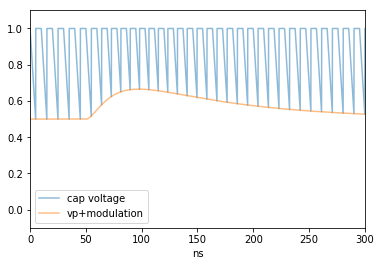

In [7]:


logic_out, uc = QFM(t,vp+modulation)

plt.plot(t*1e9,uc,alpha=0.5,label="cap voltage")
#plt.plot(t*1e9,logic_out,alpha=0.5,label="logical_out")
plt.plot(t*1e9,vp+modulation,alpha=0.5,label="vp+modulation")
plt.xlabel("ns")
plt.ylim(-0.1,1.1)
plt.legend()
plt.xlim(0,300)
plt.show()



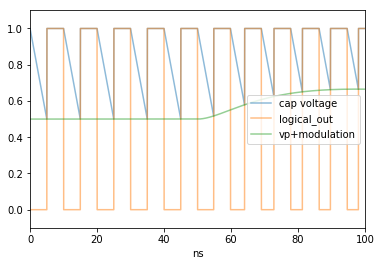

In [8]:



plt.plot(t*1e9,uc,alpha=0.5,label="cap voltage")
plt.plot(t*1e9,logic_out,alpha=0.5,label="logical_out")
plt.plot(t*1e9,vp+modulation,alpha=0.5,label="vp+modulation")
plt.xlabel("ns")
plt.ylim(-0.1,1.1)
plt.legend()
plt.xlim(0,100)
plt.show()



In [8]:
n = 50

print("without modulation")
logic_out, uc = QFM(t,vp)
TN_a = nth_edge_time(t,logic_out,n)
print("T(N={:d}) = {:3.3f} ns".format(n,TN_a*1e9))

print("with modulation")
logic_out, uc = QFM(t,vp+modulation)
TN_b = nth_edge_time(t,logic_out,n)
print("T(N={:d}) = {:3.3f} ns".format(n,TN_b*1e9))
TDiff = TN_b -TN_a
print("TDiff = {:3.3f} ns".format(TDiff*1e9))


without modulation
T(N=50) = 505.030 ns
with modulation
T(N=50) = 477.930 ns
TDiff = -27.101 ns


In [9]:
n = 80

steps = 20

print("without modulation")
logic_out, uc = QFM(t,vp)
TN_a = nth_edge_time(t,logic_out,n)
print("T(N={:d}) = {:3.3f} ns".format(n,TN_a*1e9))

TDiff_list = []
scaler_list = []

for i in range(0,steps):
  scaler = i/(steps-1)

  print("with modulation")
  logic_out, uc = QFM(t,vp+scaler*modulation)
  TN_b = nth_edge_time(t,logic_out,n)
  print("T(N={:d}) = {:3.3f} ns".format(n,TN_b*1e9))
  TDiff = TN_b -TN_a
  print("TDiff = {:3.3f} ns".format(TDiff*1e9))

  TDiff_list += [TDiff]
  scaler_list += [scaler]

TDiff_list = np.array(TDiff_list)
scaler_list = np.array(scaler_list)


without modulation
T(N=80) = 805.036 ns
with modulation
T(N=80) = 805.036 ns
TDiff = 0.000 ns
with modulation
T(N=80) = 804.076 ns
TDiff = -0.960 ns
with modulation
T(N=80) = 802.836 ns
TDiff = -2.200 ns
with modulation
T(N=80) = 801.536 ns
TDiff = -3.500 ns
with modulation
T(N=80) = 800.216 ns
TDiff = -4.820 ns
with modulation
T(N=80) = 798.916 ns
TDiff = -6.120 ns
with modulation
T(N=80) = 797.536 ns
TDiff = -7.500 ns
with modulation
T(N=80) = 796.096 ns
TDiff = -8.940 ns
with modulation
T(N=80) = 794.636 ns
TDiff = -10.400 ns
with modulation
T(N=80) = 793.196 ns
TDiff = -11.840 ns
with modulation
T(N=80) = 791.796 ns
TDiff = -13.240 ns
with modulation
T(N=80) = 790.296 ns
TDiff = -14.740 ns
with modulation
T(N=80) = 788.816 ns
TDiff = -16.220 ns
with modulation
T(N=80) = 787.376 ns
TDiff = -17.660 ns
with modulation
T(N=80) = 785.796 ns
TDiff = -19.240 ns
with modulation
T(N=80) = 784.176 ns
TDiff = -20.860 ns
with modulation
T(N=80) = 782.596 ns
TDiff = -22.440 ns
with modulation
T

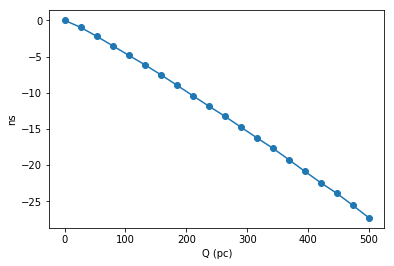

In [10]:
plt.scatter(scaler_list*Q*1e12,TDiff_list*1e9)
plt.plot(scaler_list*Q*1e12,TDiff_list*1e9)
plt.xlabel("Q (pc)")
plt.ylabel("ns")
plt.show()

In [11]:
#jitter



print("without modulation")
logic_out, uc = QFM(t,vp)
TN_a = nth_edge_time(t,logic_out,n)
print("T(N={:d}) = {:3.3f} ns".format(n,TN_a*1e9))
TDiff_list = []



for i in range(0,100):
  rand_delay = random.random()*20e-9

  modulation  = detector_signal_function(t, Q, tau1, tau2, 50e-9+rand_delay)

  R=1e3
  C=100e-12
  mod_rc = RC_filter(t,modulation,R,C)
  modulation = mod_rc



  logic_out, uc = QFM(t,vp+modulation)
  TN_b = nth_edge_time(t,logic_out,n)
  TDiff = TN_b -TN_a

  TDiff_list += [TDiff]

TDiff_list = np.array(TDiff_list)

jitter = np.std(TDiff_list)
jitter_relative = jitter/np.mean(TDiff_list)

print("Q = {:3.3f} pC".format(Q*1e12))

print("jitter = {:3.3f} ps".format(jitter*1e12))
print("relative jitter {:3.3f}%".format(jitter_relative*100))
print("Q jitter = {:3.3f} pC".format(Q*1e12*jitter_relative))

without modulation
T(N=80) = 805.036 ns
Q = 500.000 pC
jitter = 57.624 ps
relative jitter -0.212%
Q jitter = -1.059 pC


In [12]:
#jitter systematic


def jitter(Q):
  logic_out, uc = QFM(t,vp)
  TN_a = nth_edge_time(t,logic_out,n)
  TDiff_list = []

  for i in range(0,200):
    rand_delay = random.random()*20e-9
  
    modulation  = detector_signal_function(t, Q, tau1, tau2, 50e-9+rand_delay)
  
    R=1e3
    C=100e-12
    mod_rc = RC_filter(t,modulation,R,C)
    modulation = mod_rc
  
  
  
    logic_out, uc = QFM(t,vp+modulation)
    TN_b = nth_edge_time(t,logic_out,n)
    TDiff = TN_b -TN_a
  
    TDiff_list += [TDiff]
  
  TDiff_list = np.array(TDiff_list)
  
  jitter = np.std(TDiff_list)
  jitter_relative = jitter/np.mean(TDiff_list)
  
  print("Q = {:3.3f} pC".format(Q*1e12))
  
  print("jitter = {:3.3f} ps".format(jitter*1e12))
  print("relative jitter {:3.3f}%".format(jitter_relative*100))
  print("Q jitter = {:3.3f} pC".format(Q*1e12*jitter_relative))
  
  jitter_Q = jitter_relative* Q

  return jitter_Q

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


Q = 1.000 pC
jitter = 0.000 ps
relative jitter nan%
Q jitter = nan pC
Q = 1.239 pC
jitter = 0.000 ps
relative jitter nan%
Q jitter = nan pC
Q = 1.535 pC
jitter = 0.000 ps
relative jitter nan%
Q jitter = nan pC
Q = 1.902 pC
jitter = 0.000 ps
relative jitter nan%
Q jitter = nan pC
Q = 2.357 pC
jitter = 0.000 ps
relative jitter nan%
Q jitter = nan pC
Q = 2.920 pC
jitter = 0.000 ps
relative jitter nan%
Q jitter = nan pC
Q = 3.617 pC
jitter = 0.000 ps
relative jitter nan%
Q jitter = nan pC
Q = 4.482 pC
jitter = 0.000 ps
relative jitter nan%
Q jitter = nan pC
Q = 5.553 pC
jitter = 0.000 ps
relative jitter nan%
Q jitter = nan pC
Q = 6.880 pC
jitter = 7.424 ps
relative jitter -7.677%
Q jitter = -0.528 pC
Q = 8.525 pC
jitter = 6.499 ps
relative jitter -4.002%
Q jitter = -0.341 pC
Q = 10.562 pC
jitter = 5.268 ps
relative jitter -2.411%
Q jitter = -0.255 pC
Q = 13.086 pC
jitter = 16.919 ps
relative jitter -4.941%
Q jitter = -0.647 pC
Q = 16.214 pC
jitter = 15.613 ps
relative jitter -3.376%
Q jitt

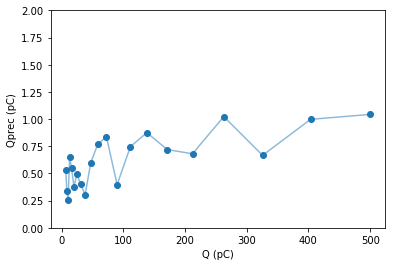

In [13]:
prec = []
Qs   = []
for Q in np.exp(np.linspace(np.log(1e-12),np.log(500e-12),30)):
  Qs += [Q]
  prec += [jitter(Q)]
Qs = np.array(Qs)
prec = np.array(prec)

plt.scatter(Qs*1e12,abs(prec)*1e12)
plt.plot(Qs*1e12,abs(prec)*1e12,alpha=0.5)
plt.xlabel("Q (pC)")
plt.ylabel("Qprec (pC)")
plt.ylim(0,2)
plt.show()
